In [1]:
import numpy as np

In [2]:
np.__version__

'1.18.2'

In [3]:
import warnings

In [4]:
warnings.filterwarnings('ignore')

##  예제 13-1-2-1 방향그래프

In [5]:
import networkx as nx

In [6]:
import matplotlib.pyplot as plt

In [7]:
%matplotlib inline

In [8]:
Gd = nx.DiGraph()

In [9]:
V = [1,2,3,4,5,6]

In [10]:
Gd.add_nodes_from(V)

In [11]:
e= [(1,2),(2,1),(1,2),(1,5),(3,2),(1,1),(2,3),(2,5),(3,4),(4,5),(4,6)]

In [12]:
Gd.add_edges_from(e)

In [13]:
pos_nodes = nx.spring_layout(Gd)

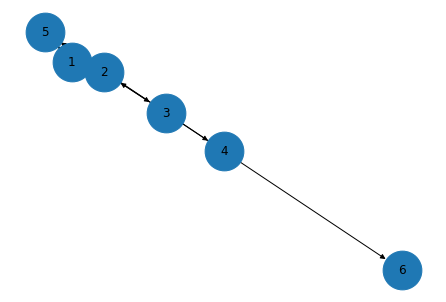

In [14]:
nx.draw(Gd, pos_nodes,node_size=1500,with_labels=True)

In [15]:
nx.to_numpy_matrix(Gd)

matrix([[1., 1., 0., 0., 1., 0.],
        [1., 0., 1., 0., 1., 0.],
        [0., 1., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 1.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]])

In [16]:
a = nx.adjacency_matrix(Gd)

In [17]:
a.data

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [18]:
a.todense()

matrix([[1, 1, 0, 0, 1, 0],
        [1, 0, 1, 0, 1, 0],
        [0, 1, 0, 1, 0, 0],
        [0, 0, 0, 0, 1, 1],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]], dtype=int32)

##  예제 13-1-2-2 방향그래프 꾸미기

In [19]:
G = nx.DiGraph()

In [20]:
G.add_edges_from([('A', 'B'),('C','D'),('G','D')], weight=1)
G.add_edges_from([('D','A'),('D','E'),('B','D'),('D','E')], weight=2)
G.add_edges_from([('B','C'),('E','F')], weight=3)
G.add_edges_from([('C','F')], weight=4)

In [21]:
val_map = {'A': 1.0,'D': 0.5714285714285714,'H': 0.0}


In [22]:
values = [val_map.get(node, 0.45) for node in G.nodes()]

In [23]:
red_edges = [('C','D'),('D','A')]

In [24]:
edge_colors = ['black' if not edge in red_edges else 'red' for edge in G.edges()]

In [25]:
edge_colors

['black', 'black', 'black', 'red', 'black', 'red', 'black', 'black', 'black']

In [26]:
edge_labels=dict([((u,v,),d['weight'])
                 for u,v,d in G.edges(data=True)])

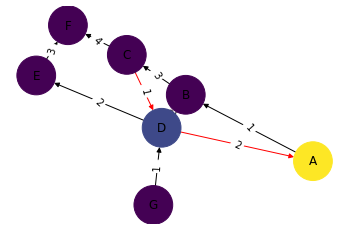

In [27]:
pos=nx.spring_layout(G)
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)
nx.draw(G,pos, node_color = values, node_size=1500,edge_color=edge_colors, with_labels=True)

In [28]:
nx.to_numpy_matrix(G)

matrix([[0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 3., 2., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 4.],
        [2., 0., 0., 0., 0., 2., 0.],
        [0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 3.],
        [0., 0., 0., 0., 0., 0., 0.]])

In [29]:
sp = nx.to_scipy_sparse_matrix(G)

In [30]:
sp.toarray()

array([[0, 1, 0, 0, 0, 0, 0],
       [0, 0, 3, 2, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 4],
       [2, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 3],
       [0, 0, 0, 0, 0, 0, 0]], dtype=int32)